<a href="https://colab.research.google.com/github/AntonioC4r10s/cirrhosis-case/blob/main/cirrhosis_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1- Loading data and initial informations**

In [2]:
# @title ##### **Imports**

#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



sns.set_style('whitegrid')

In [3]:
# @title ##### **Path of data**

PATH_DATA = '/content/drive/MyDrive/Colab Notebooks/projects_github/cirrhosis-case/liver_cirrhosis.csv'

In [4]:
# @title ##### **Dataframe load**

df = pd.read_csv(PATH_DATA)
df_original = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [5]:
# @title ##### **Dataframe head informations**

df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


### **2- Initial data visualizations**

<ipython-input-6-a3be17132266>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stage', y='Count', data=df_stage_counts, ax=ax, palette='Blues')


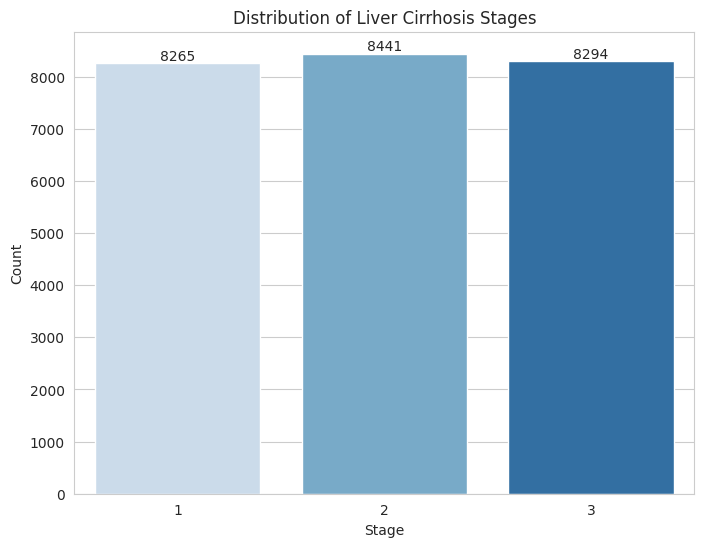

In [6]:
stage_counts = df['Stage'].value_counts()
df_stage_counts = pd.DataFrame({'Stage': stage_counts.index, 'Count': stage_counts.values})

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Stage', y='Count', data=df_stage_counts, ax=ax, palette='Blues')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Stage')
ax.set_ylabel('Count')
ax.set_title('Distribution of Liver Cirrhosis Stages')
plt.show()

<ipython-input-7-8466b178c22a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Count', data=df_sex_counts, ax=ax, palette='husl')


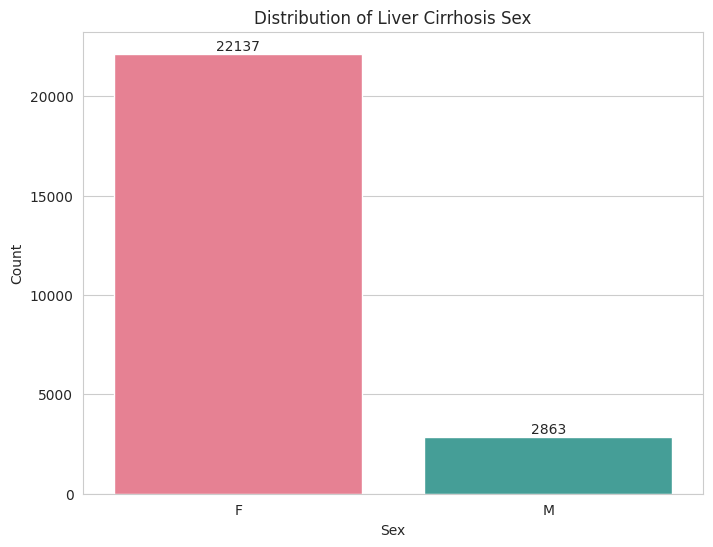

In [7]:
sex_counts = df['Sex'].value_counts()
df_sex_counts = pd.DataFrame({'Sex': sex_counts.index, 'Count': sex_counts.values})

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Sex', y='Count', data=df_sex_counts, ax=ax, palette='husl')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_title('Distribution of Liver Cirrhosis Sex')
plt.show()

<ipython-input-8-401c5bd3d41e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ascites', y='Count', data=df_ascites_counts, ax=ax, palette='Set1')


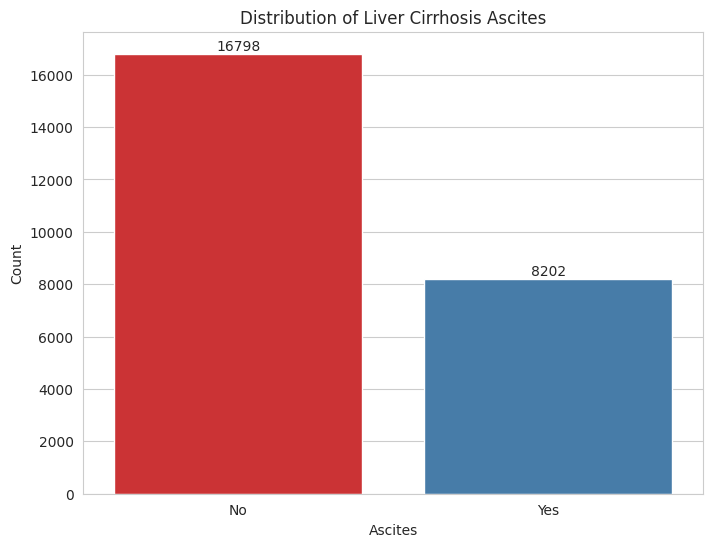

In [8]:
ascites_counts = df['Ascites'].value_counts()
df_ascites_counts = pd.DataFrame({'Ascites': ascites_counts.index, 'Count': ascites_counts.values})
df_ascites_counts = df_ascites_counts.replace({'Y': 'Yes', 'N': 'No'})

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Ascites', y='Count', data=df_ascites_counts, ax=ax, palette='Set1')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Ascites')
ax.set_ylabel('Count')
ax.set_title('Distribution of Liver Cirrhosis Ascites')
plt.show()

<ipython-input-9-37ac42f17dbf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Edema', y='Count', data=df_edema_counts, ax=ax, palette='Set2')


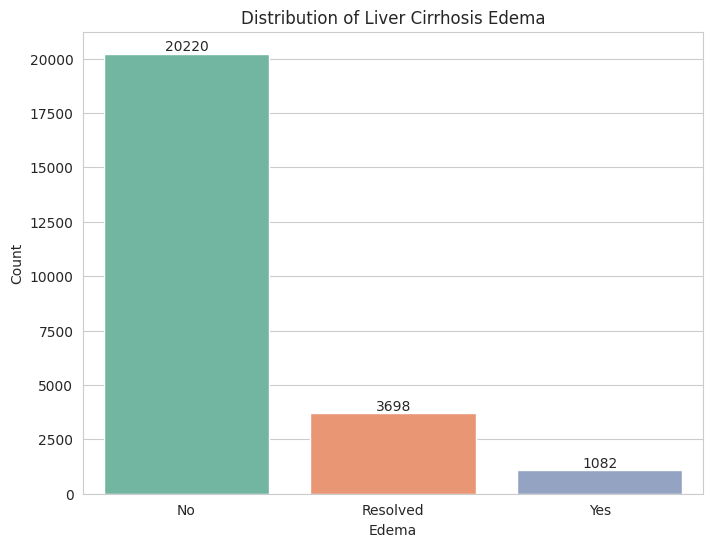

In [9]:
edema_counts = df['Edema'].value_counts()
df_edema_counts = pd.DataFrame({'Edema': edema_counts.index, 'Count': edema_counts.values})
df_edema_counts = df_edema_counts.replace({'Y': 'Yes', 'N': 'No', 'S': 'Resolved'})

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Edema', y='Count', data=df_edema_counts, ax=ax, palette='Set2')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Edema')
ax.set_ylabel('Count')
ax.set_title('Distribution of Liver Cirrhosis Edema')
plt.show()

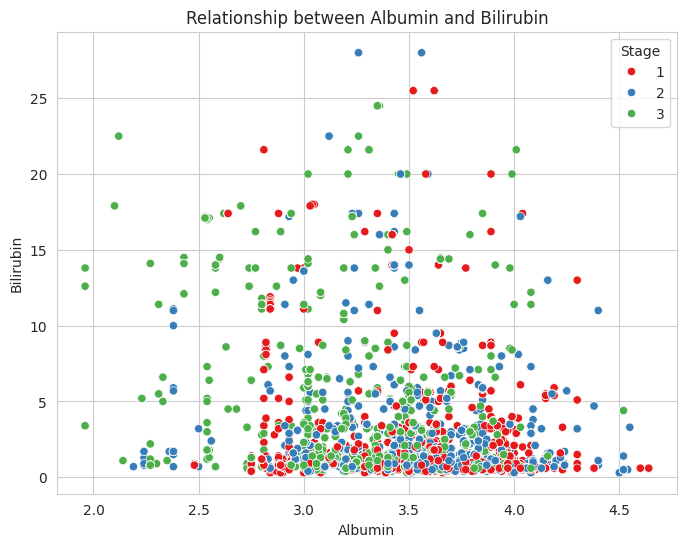

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df, x='Albumin', y='Bilirubin', hue='Stage', palette='Set1')

ax.set_xlabel('Albumin')
ax.set_ylabel('Bilirubin')
ax.set_title('Relationship between Albumin and Bilirubin')
plt.show()

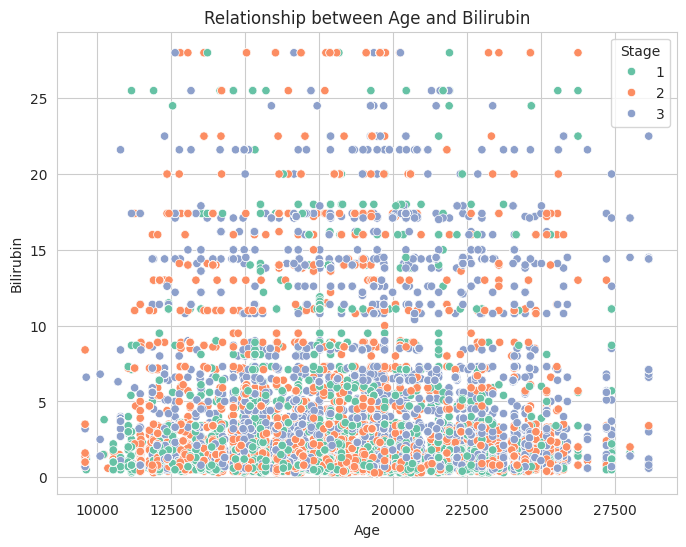

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Bilirubin', hue='Stage', palette='Set2')

ax.set_xlabel('Age')
ax.set_ylabel('Bilirubin')
ax.set_title('Relationship between Age and Bilirubin')
plt.show()

<ipython-input-12-85369a079974>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stage', y='Albumin', palette='Set2')


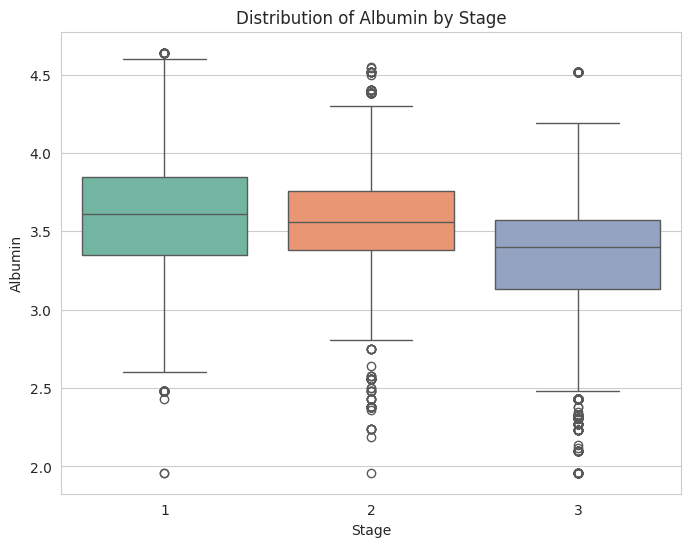

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df, x='Stage', y='Albumin', palette='Set2')

ax.set_xlabel('Stage')
ax.set_ylabel('Albumin')
ax.set_title('Distribution of Albumin by Stage')
plt.show()

### **3- Data clean**

In [13]:
df.dtypes

N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage              int64
dtype: object

In [14]:
df['Status'] = df['Status'].replace({'C': 1, 'CL': 0, 'D': 2})
df['Sex'] = df['Sex'].replace({'M': 1, 'F': 0})
df['Ascites'] = df['Ascites'].replace({'Y': 1, 'N': 0})
df['Edema'] = df['Edema'].replace({'Y': 1, 'N': 0, 'S': 2})
df['Drug'] = df['Drug'].replace({'D-penicillamine': 1, 'Placebo': 0})
df['Drug'] = df['Drug'].astype(int)
df['Stage'] = df['Stage'].astype(int)
df['Albumin'] = df['Albumin'].astype(float)
df['Bilirubin'] = df['Bilirubin'].astype(float)
df['Age'] = df['Age'].astype(int)
df['Hepatomegaly'] = df['Hepatomegaly'].replace({'Y': 1, 'N': 0})
df['Hepatomegaly'].astype(int)
df['Spiders'] = df['Spiders'].replace({'Y': 1, 'N': 0})
df['Spiders'] = df['Spiders'].astype(int)
df['Edema'] = df['Edema'].astype(int)
df['Ascites'] = df['Ascites'].astype(int)
df.dtypes


N_Days             int64
Status             int64
Drug               int64
Age                int64
Sex                int64
Ascites            int64
Hepatomegaly       int64
Spiders            int64
Edema              int64
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage              int64
dtype: object

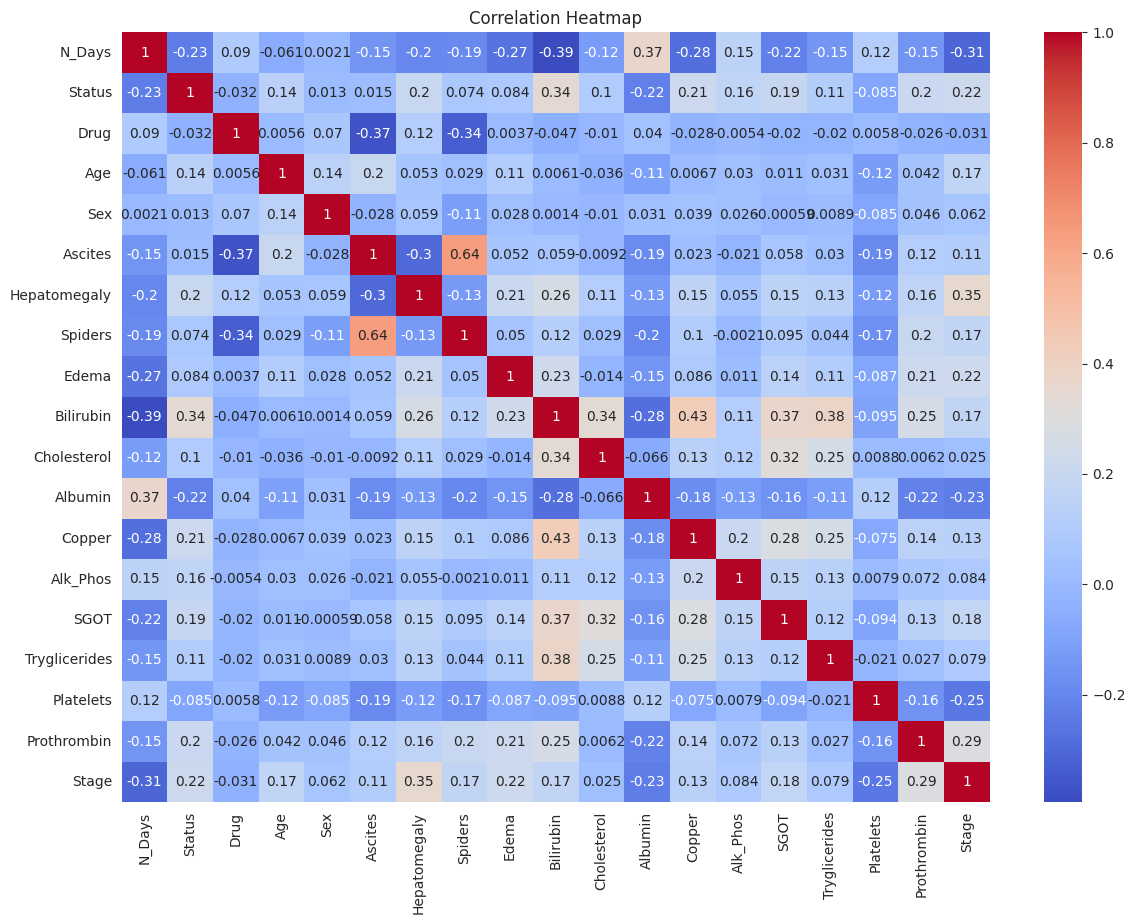

In [15]:
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', ax=ax)

ax.set_title('Correlation Heatmap')
plt.show()

In [16]:
df_original.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [17]:
df_encoded = pd.get_dummies(df_original, columns=['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'])
df_encoded.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,2221,18499,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,...,False,True,False,False,True,True,False,True,False,False
1,1230,19724,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,...,True,False,True,True,False,False,True,True,False,False
2,4184,11839,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,...,False,True,False,True,False,True,False,True,False,False
3,2090,16467,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,...,False,True,False,True,False,True,False,True,False,False
4,2105,21699,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,...,False,True,False,False,True,True,False,True,False,False


In [18]:
X = df_encoded.drop('Stage', axis=1)
y = df_encoded['Stage']

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [21]:
print(f'Variância explicada pelos componentes principais: {pca.explained_variance_ratio_}')


Variância explicada pelos componentes principais: [1.71034565e-01 1.50164476e-01 7.69019938e-02 6.59628600e-02
 5.87927395e-02 5.32610381e-02 4.69291740e-02 4.48833592e-02
 4.12863920e-02 3.81741987e-02 3.49035812e-02 3.31149967e-02
 3.11717258e-02 2.91596573e-02 2.84605743e-02 2.49412841e-02
 2.07779818e-02 1.89590644e-02 1.63287357e-02 1.47916023e-02
 1.43321591e-32 8.62407995e-33 5.67744675e-33 3.95383716e-33
 1.05451619e-33 1.05451619e-33 4.82963829e-34]


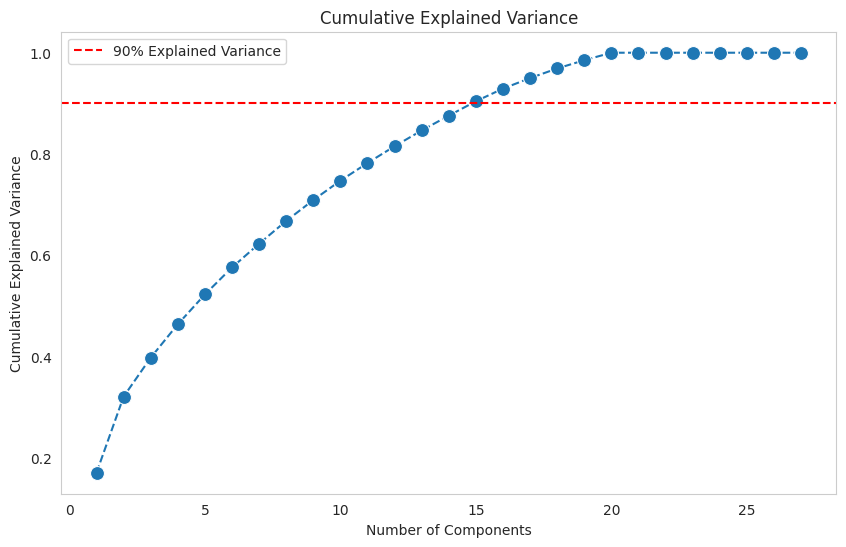

In [87]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, len(explained_variance) + 1),
             y=explained_variance, marker='o', linestyle='--', markersize=10)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Explained Variance')
plt.legend()
plt.grid()
plt.show()

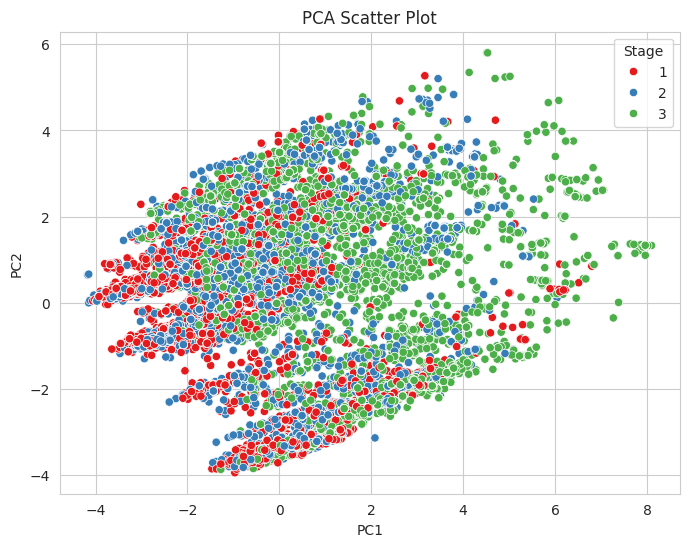

In [78]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', ax=ax)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA Scatter Plot')
plt.show()

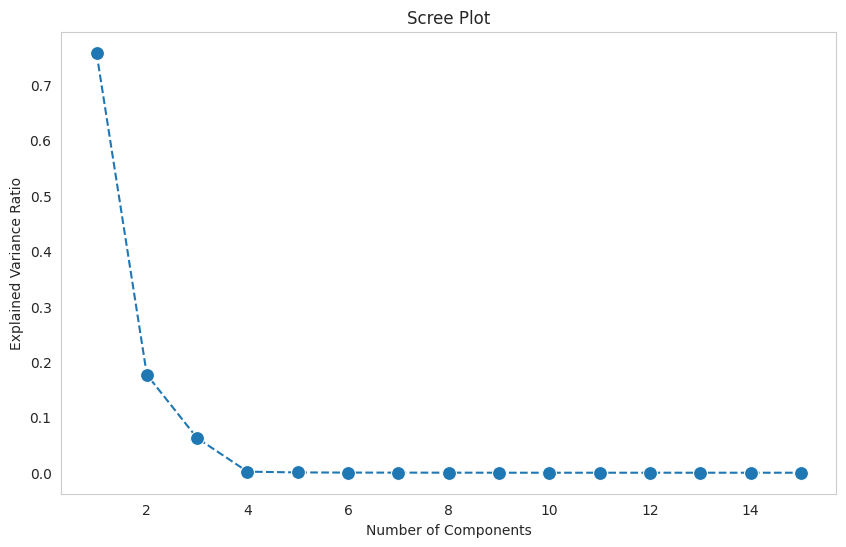

In [86]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, len(pca.explained_variance_ratio_) + 1), y=pca.explained_variance_ratio_, marker='o', linestyle='--', markersize=10)
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

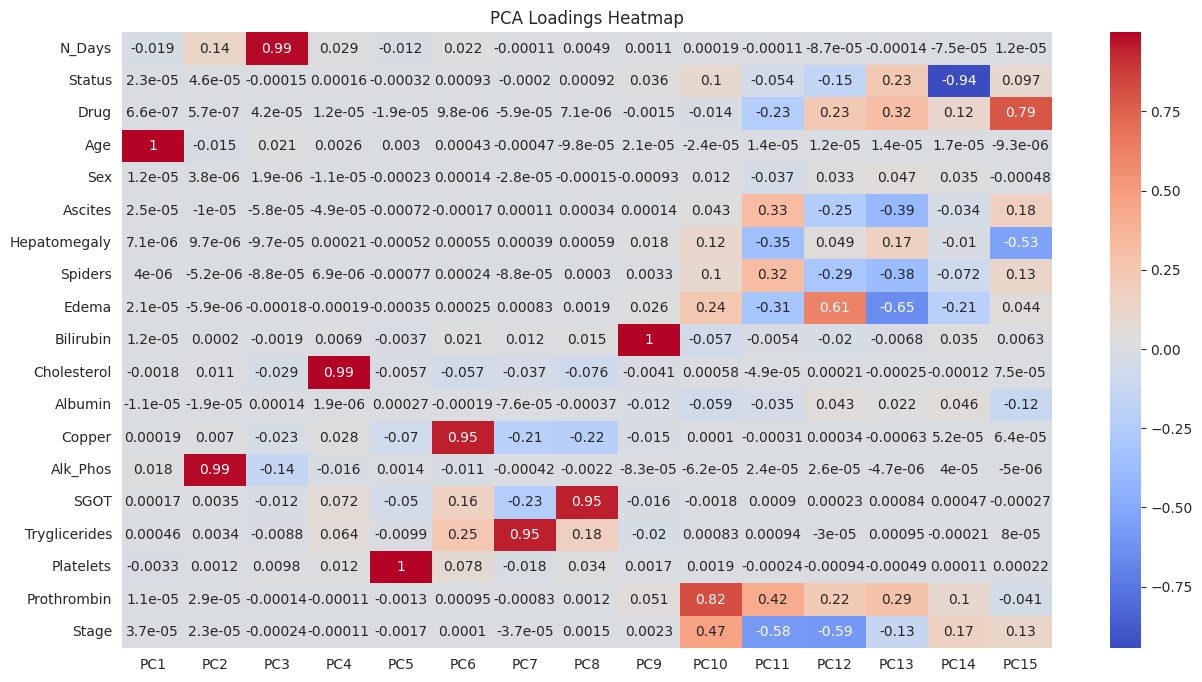

In [24]:
# Ajustar PCA com 15 componentes
pca = PCA(n_components=15)
pca_transformed = pca.fit(df)

# Obter os loadings
loadings = pca.components_.T

# Criar DataFrame de loadings
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=df.columns)

# Plotar heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm')
plt.title('PCA Loadings Heatmap')
plt.show()

In [25]:
print(f'Variância explicada acumulada: {sum(pca.explained_variance_ratio_)}')


Variância explicada acumulada: 0.999999977035362


In [26]:
df_pca = loadings_df

In [27]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
N_Days,-1.891387e-02,1.395099e-01,0.989291,0.028688,-0.012250,0.022027,-0.000113,0.004883,0.001056,0.000195,-0.000113,-0.000087,-0.000140,-0.000075,0.000012
Status,2.281053e-05,4.645029e-05,-0.000151,0.000164,-0.000320,0.000930,-0.000199,0.000924,0.035878,0.102629,-0.054275,-0.150313,0.234301,-0.944537,0.096613
Drug,6.563605e-07,5.654876e-07,0.000042,0.000012,-0.000019,0.000010,-0.000059,0.000007,-0.001502,-0.014060,-0.230963,0.234134,0.315321,0.124511,0.790994
Age,9.996522e-01,-1.515398e-02,0.021202,0.002594,0.003027,0.000432,-0.000473,-0.000098,0.000021,-0.000024,0.000014,0.000012,0.000014,0.000017,-0.000009
Sex,1.205659e-05,3.798519e-06,0.000002,-0.000011,-0.000232,0.000137,-0.000028,-0.000155,-0.000934,0.011688,-0.037278,0.033445,0.046947,0.034529,-0.000475


In [28]:
loadings = pca.components_.T

In [29]:
X.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,2221,18499,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,...,False,True,False,False,True,True,False,True,False,False
1,1230,19724,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,...,True,False,True,True,False,False,True,True,False,False
2,4184,11839,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,...,False,True,False,True,False,True,False,True,False,False
3,2090,16467,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,...,False,True,False,True,False,True,False,True,False,False
4,2105,21699,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,...,False,True,False,False,True,True,False,True,False,False


In [31]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: Stage, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
X_train.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
4913,1536,20567,2.5,317.000000,3.46,217.000000,714.000000,130.200000,140.000000,279.0,...,False,True,False,True,False,True,False,True,False,False
9338,1170,18021,20.0,652.000000,3.46,159.000000,884.000000,215.400000,104.000000,227.0,...,False,True,False,False,True,False,True,False,True,False
24211,3468,23011,0.6,369.510563,3.94,97.648387,1982.655769,122.556346,124.702128,234.0,...,False,False,True,True,False,False,True,True,False,False
18791,597,22306,3.3,369.510563,2.73,97.648387,1982.655769,122.556346,124.702128,438.0,...,False,True,False,True,False,False,True,False,True,False
16066,4523,19722,1.8,262.000000,3.34,101.000000,7277.000000,82.560000,158.000000,286.0,...,False,True,False,True,False,True,False,True,False,False


In [34]:
pca = PCA(n_components=15)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [37]:
X_train

array([[ 2.03106104e+03, -1.35367485e+03, -1.30154944e+02, ...,
        -3.20413958e-01, -8.88900390e-01, -1.53270157e-01],
       [-5.05309102e+02, -1.19578562e+03, -5.74504309e+02, ...,
        -6.53601366e-01,  5.92459846e-01,  5.24512489e-01],
       [ 4.46356475e+03,  1.38385073e+02,  1.65084977e+03, ...,
         1.47814914e-01,  2.10892829e-01, -1.28208398e-01],
       ...,
       [-4.51746408e+03,  2.47440501e+00, -4.09457241e+02, ...,
        -1.31601348e-01,  1.69153571e-01, -1.74687615e-02],
       [-7.03468478e+03, -8.42030183e+01, -1.32788367e+03, ...,
         5.82084180e-01, -1.13521863e+00, -1.94144091e-01],
       [ 6.46833126e+03, -1.18026467e+03,  1.62763224e+02, ...,
        -9.97217635e-01,  1.22134441e+00, -5.63944563e-01]])

### **4- ML Models Aplications**

In [35]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
yp_rf = rf_classifier.predict(X_test)

In [39]:
rf_score = accuracy_score(y_test, yp_rf)
print(f'Acurácia do Random Forest: {100*rf_score:.2f}%')

Acurácia do Random Forest: 92.77%


Text(70.72222222222221, 0.5, 'Real')

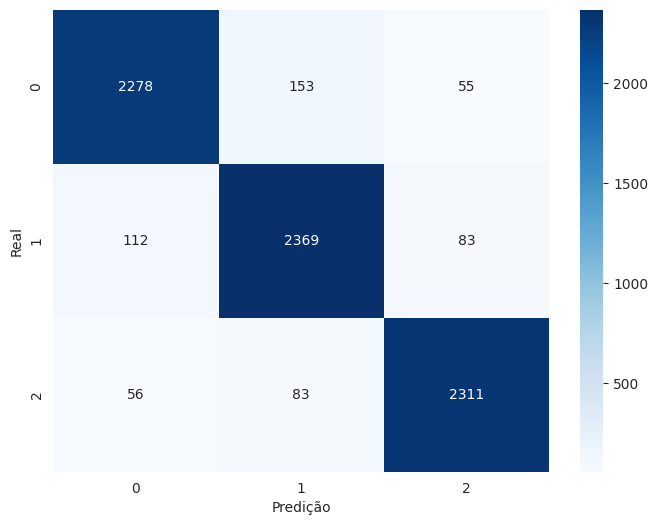

In [40]:
matrix_rf = confusion_matrix(y_test, yp_rf)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(matrix_rf, annot=True, fmt='d', cmap='Blues', ax=ax)

ax.set_xlabel('Predição')
ax.set_ylabel('Real')

In [41]:
cross_val_rf = cross_val_score(rf_classifier, X, y, cv=5)

In [42]:
print(f'Acurácia média do Random Forest: {100*cross_val_rf.mean():.3f}%')

Acurácia média do Random Forest: 95.108%


In [43]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [44]:
yp_gb = gb_classifier.predict(X_test)

In [45]:
yp_gb

array([1, 1, 3, ..., 2, 3, 3])

In [46]:
gb_score = accuracy_score(y_test, yp_gb)
print(f'Acurácia do Gradient Boosting: {100*gb_score:.2f}%')

Acurácia do Gradient Boosting: 80.29%


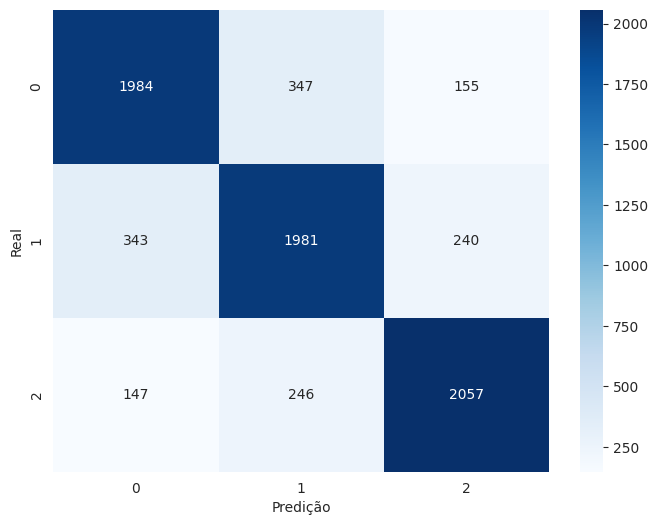

In [47]:
matrix_gb = confusion_matrix(y_test, yp_gb)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(matrix_gb, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predição')
ax.set_ylabel('Real')
plt.show()

In [48]:
cross_val_gb = cross_val_score(gb_classifier, X, y, cv=5)

In [49]:
print(f'Acurácia média do Gradient Boosting: {100*cross_val_gb.mean():.3f}%')

Acurácia média do Gradient Boosting: 84.912%


In [50]:
ab_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [51]:
yp_ab = ab_classifier.predict(X_test)

In [52]:
yp_ab

array([1, 1, 3, ..., 2, 3, 3])

In [53]:
score_ab = accuracy_score(y_test, yp_ab)
print(f'Acurácia do AdaBoost: {100*score_ab:.2f}%')

Acurácia do AdaBoost: 67.87%


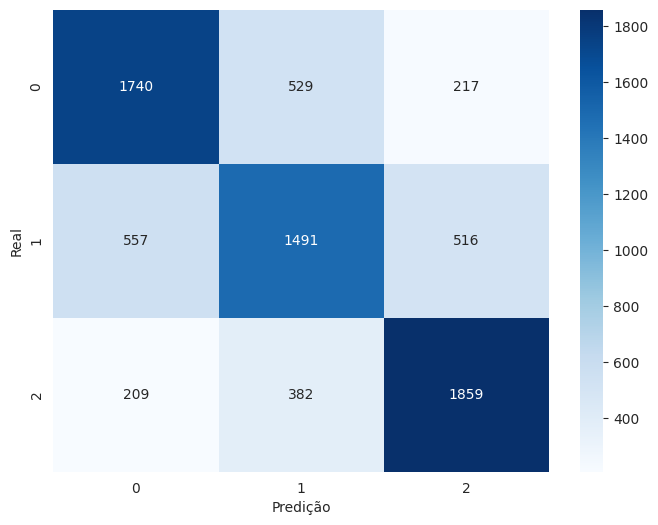

In [54]:
matrix_ab = confusion_matrix(y_test, yp_ab)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(matrix_ab, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predição')
ax.set_ylabel('Real')
plt.show()

In [88]:
cross_val_ab = cross_val_score(ab_classifier, X, y, cv=5)
print(f'Acurácia média do AdaBoost: {100*cross_val_ab.mean():.3f}%')

Acurácia média do AdaBoost: 72.140%


In [55]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
yp_knn = knn_classifier.predict(X_test)
yp_knn

array([1, 1, 1, ..., 1, 3, 2])

In [57]:
score_knn = accuracy_score(y_test, yp_knn)
print(f'Acurácia do KNN: {100*score_knn:.2f}%')

Acurácia do KNN: 82.56%


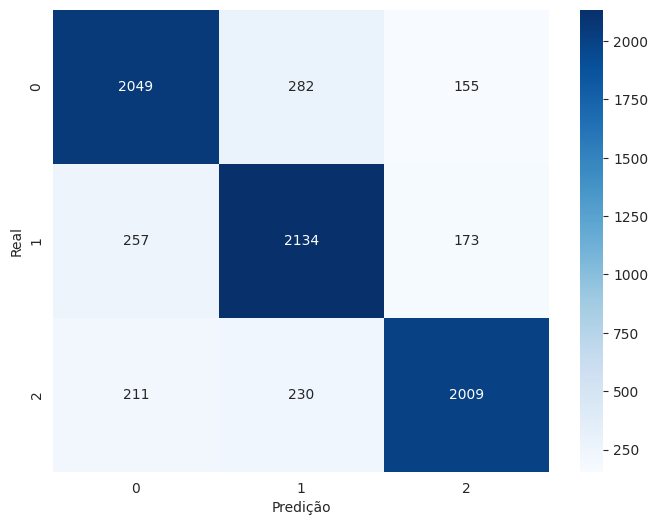

In [58]:
matrix_knn = confusion_matrix(y_test, yp_knn)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(matrix_knn, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predição')
ax.set_ylabel('Real')
plt.show()

In [59]:
cross_val_knn = cross_val_score(knn_classifier, X, y, cv=5)


In [60]:
print(f'Acurácia média do KNN: {100*cross_val_knn.mean():.3f}%')

Acurácia média do KNN: 80.612%


### **5- Comparisons betwen ML models**

<ipython-input-89-063c1bea862f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Random Forest', 'Gradient Boosting', 'AdaBoost', 'K-Neighbors'], y=[rf_score, gb_score, score_ab, score_knn], palette='Set1')


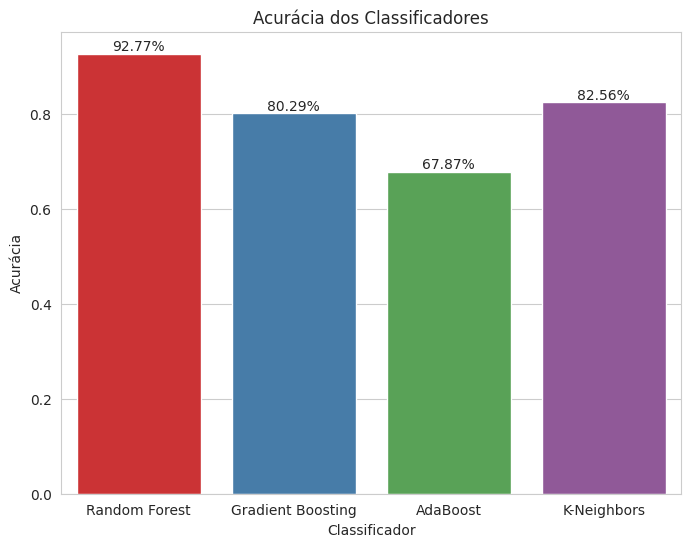

In [89]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=['Random Forest', 'Gradient Boosting', 'AdaBoost', 'K-Neighbors'], y=[rf_score, gb_score, score_ab, score_knn], palette='Set1')

for p in ax.patches:
    ax.annotate(f'{100*p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

ax.set_xlabel('Classificador')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia dos Classificadores')
plt.show()

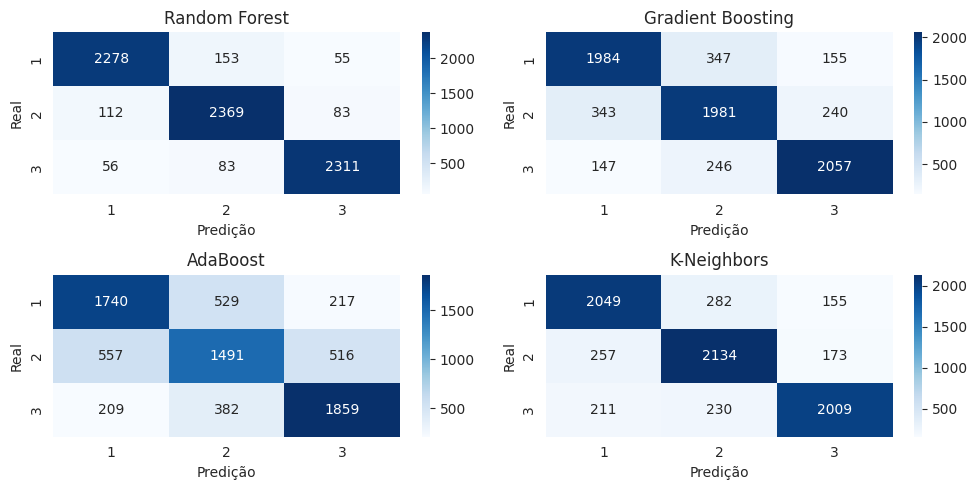

In [69]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

classnames = ['1', '2', '3']
sns.heatmap(matrix_rf, annot=True, fmt='d', cmap='Blues', ax=axs[0, 0], xticklabels=classnames, yticklabels=classnames)
sns.heatmap(matrix_gb, annot=True, fmt='d', cmap='Blues', ax=axs[0, 1], xticklabels=classnames, yticklabels=classnames)
sns.heatmap(matrix_ab, annot=True, fmt='d', cmap='Blues', ax=axs[1, 0], xticklabels=classnames, yticklabels=classnames)
sns.heatmap(matrix_knn, annot=True, fmt='d', cmap='Blues', ax=axs[1, 1], xticklabels=classnames, yticklabels=classnames)

axs[0, 0].set_title('Random Forest')
axs[0, 1].set_title('Gradient Boosting')
axs[1, 0].set_title('AdaBoost')
axs[1, 1].set_title('K-Neighbors')

for ax in axs.flat:
    ax.set(xlabel='Predição', ylabel='Real')


plt.tight_layout()
plt.show()